# **Import Library**

In [ ]:
import os
import numpy as np
import cv2
import matplotlib.pyplot as plt
from tensorflow.keras.models import load_model

# **Connect With Google Drive**

In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Define class labels
class_labels = ['Blepharitis', 'Conjunctivitis', 'Entropion', 'Eyelid_Lump', 'Nuclear Sclerosis', 'Pigmented Keratitis']

# Load the pre-trained model
model = load_model('/content/drive/My Drive/dog_disease_detection_model.h5')

# **Testing Model for Each Disease**

In [ ]:
# Folder containing test images
image_folder = '/content/drive/MyDrive/dataset/test/Pigmented keratitis'

# Function to preprocess the image
def preprocess_image(image_folder):
    # Read image
    image = cv2.imread(image_folder)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_folder}")

    # Resize image
    image = cv2.resize(image, (224, 224))

    # Normalize pixel values
    image = image.astype('float32') / 255.0

    # Expand dimensions for model (1, 224, 224, 3)
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
# Function to predict the image
def predict_image(model, image_folder):
    processed_image = preprocess_image(image_folder)
    predictions = model.predict(processed_image)[0]  # Get the first prediction

    # Sort predictions to get the indices of the top 3 classes
    top_3_indices = np.argsort(predictions)[-3:][::-1]  # Get the top 3 indices in descending order

    # Get class names and confidence values for the top 3 predictions
    top_3_classes = [class_labels[idx] for idx in top_3_indices]
    top_3_confidences = [predictions[idx] * 100 for idx in top_3_indices]

    return top_3_classes, top_3_confidences

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 116ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 45ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step


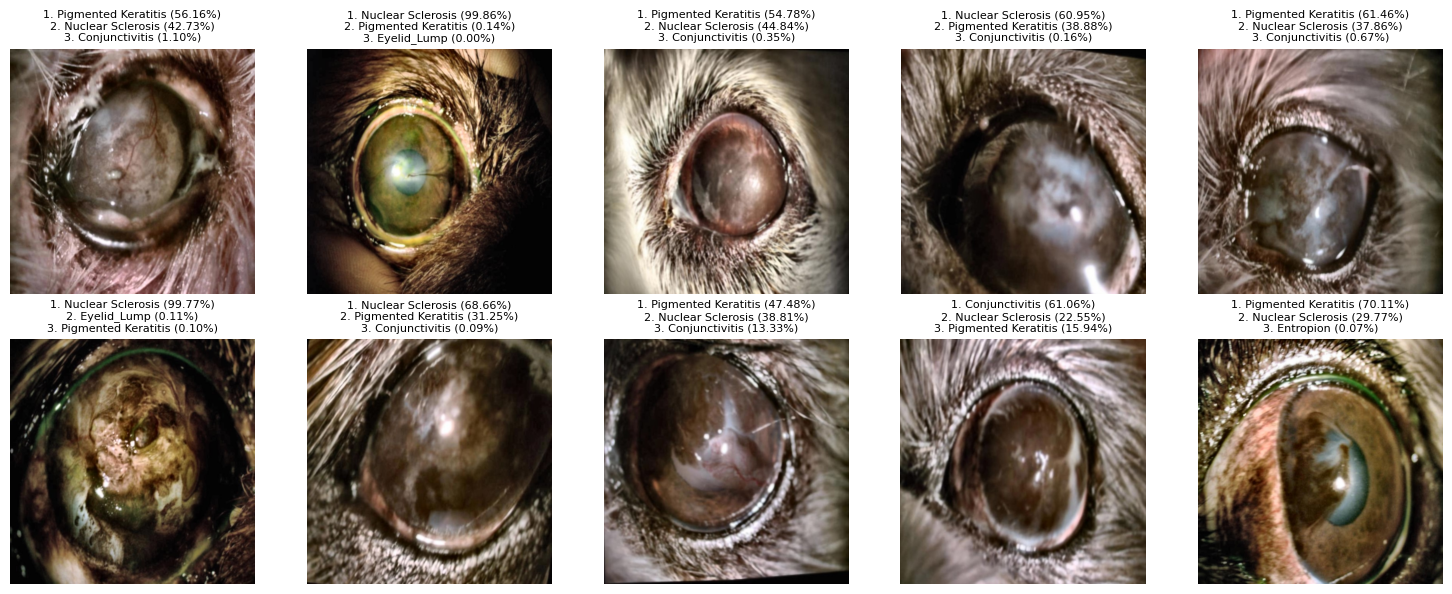

Accuracy (Top-3): 100.00%


In [ ]:
# Function to process all images in the folder and plot results with top 3 predictions
def test_model_on_folder(model, image_folder):
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

    correct_predictions = 0
    total_images = len(image_paths)
    all_confidences = []
    all_predictions = []
    all_true_labels = []

   # Adjust grid size based on number of images
    rows = (total_images // 5) + (total_images % 5 != 0)
    cols = 5 if total_images > 5 else total_images

    # Prepare the plot
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i, image_folder in enumerate(image_paths):
        # Extract true label from the filename
        true_label = image_folder.split(os.path.sep)[-2]

        # Predict the image
        top_3_classes, top_3_confidences = predict_image(model, image_folder)

        # Update accuracy tracking if true label is in the top 3 predicted classes
        if true_label.lower() in [cls.lower() for cls in top_3_classes]:
            correct_predictions += 1

        all_confidences.append(top_3_confidences[0])  # Use the confidence from the first prediction
        all_predictions.append(top_3_classes[0])  # Use the first predicted class
        all_true_labels.append(true_label)

        # Plot image
        image = cv2.imread(image_folder)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        # Show top 3 predictions and the confidence
        axes[i].imshow(image)
        axes[i].set_title(f'1. {top_3_classes[0]} ({top_3_confidences[0]:.2f}%)\n2. {top_3_classes[1]} ({top_3_confidences[1]:.2f}%)\n3. {top_3_classes[2]} ({top_3_confidences[2]:.2f}%)', fontsize=8)
        axes[i].axis('off')

    # Hide remaining empty axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # Calculate and print accuracy
    accuracy = correct_predictions / total_images * 100
    print(f"Accuracy (Top-3): {accuracy:.2f}%")

# Run the testing function on the folder
test_model_on_folder(model, image_folder)

# **Testing Model for All Disease at Once**

In [ ]:
# Folder containing test images
image_folder = '/content/drive/MyDrive/dataset/testing/data'

# Function to preprocess the image
def preprocess_image(image_folder):
    # Read image
    image = cv2.imread(image_folder)
    if image is None:
        raise FileNotFoundError(f"Image not found at path: {image_folder}")

    # Resize image
    image = cv2.resize(image, (224, 224))

    # Normalize pixel values
    image = image.astype('float32') / 255.0

    # Expand dimensions for model
    image = np.expand_dims(image, axis=0)
    return image

In [ ]:
# Function to predict the image
def predict_image(model, image_folder):
    processed_image = preprocess_image(image_folder)
    predictions = model.predict(processed_image)[0]

    # Sort predictions to get the indices of the top 3 classes
    top_3_indices = np.argsort(predictions)[-3:][::-1]

    # Get class names and confidence scores for the top 3 predictions
    top_3_classes = [class_labels[idx] for idx in top_3_indices]
    top_3_confidences = [predictions[idx] * 100 for idx in top_3_indices]

    return top_3_classes, top_3_confidences

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 34ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 33ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 36ms/step


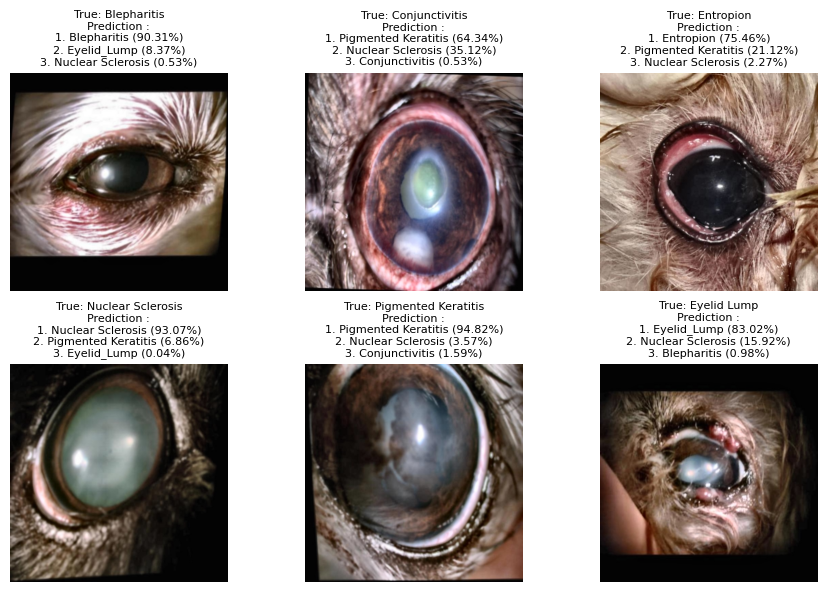

Accuracy (Top-3): 83.33%


In [ ]:
# Function to process all images in the folder and calculate accuracy
def test_model_on_folder_with_filename_labels(model, image_folder):
    image_paths = [os.path.join(image_folder, f) for f in os.listdir(image_folder) if f.endswith('.jpg') or f.endswith('.png')]

    correct_predictions = 0
    total_images = len(image_paths)

    # Adjust grid size based on number of images
    rows = (total_images // 3) + (total_images % 3 != 0)
    cols = 3 if total_images > 3 else total_images

    # Prepare plot
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))
    axes = axes.flatten()

    for i, image_folder in enumerate(image_paths):
        # Extract true label from the filename
        filename = os.path.basename(image_folder)
        true_label = filename.split('_')[0]

        # Predict the image
        top_3_classes, top_3_confidences = predict_image(model, image_folder)

        # Update accuracy tracking if true label is in the top 3 predicted classes
        if true_label.strip().lower() in [cls.strip().lower() for cls in top_3_classes]:
            correct_predictions += 1

        # Plot the image with predictions
        image = cv2.imread(image_folder)
        image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

        axes[i].imshow(image)
        axes[i].set_title(
            f'True: {true_label}\n'
            f'Prediction :\n'
            f'1. {top_3_classes[0]} ({top_3_confidences[0]:.2f}%)\n'
            f'2. {top_3_classes[1]} ({top_3_confidences[1]:.2f}%)\n'
            f'3. {top_3_classes[2]} ({top_3_confidences[2]:.2f}%)',
            fontsize=8
        )
        axes[i].axis('off')

    # Hide remaining empty axes
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    plt.tight_layout()
    plt.show()

    # Calculate and print accuracy
    accuracy = correct_predictions / total_images * 100
    print(f"Accuracy (Top-3): {accuracy:.2f}%")

# Run the testing function on the folder
test_model_on_folder_with_filename_labels(model, image_folder)